Semana #4 Repaso

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
sym.init_printing(use_unicode=True)
import os
import os.path as path
import wget

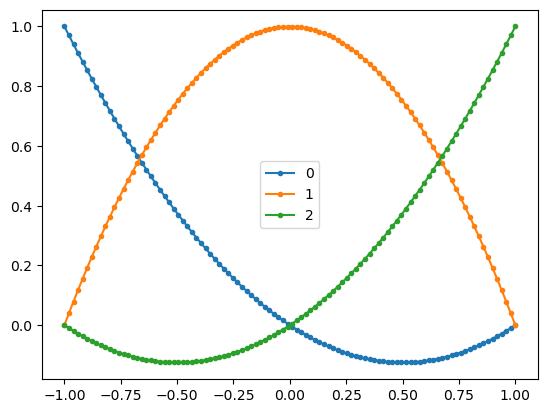

In [58]:
## L no es mas que una funcion que es expresada de una forma distinta
## En este caso cuando se evalue esta funcion va a tener tres posibles resultados
## Por tanto L al ser evaluada es una tupla de tres posiciones 
L = ( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1) )
x = np.linspace(-1,1,100)
F = np.zeros((x.shape[0],3))

for i in range(len(L)):
    F[:,i] = L[i](x)
    ## El '.-' Pasado por argumento hace que la funcion marque los puntos en los que esta definida
    plt.plot(x,F[:,i],'.-',label = str(i))
    plt.legend()


Interpolacion de Lagrange

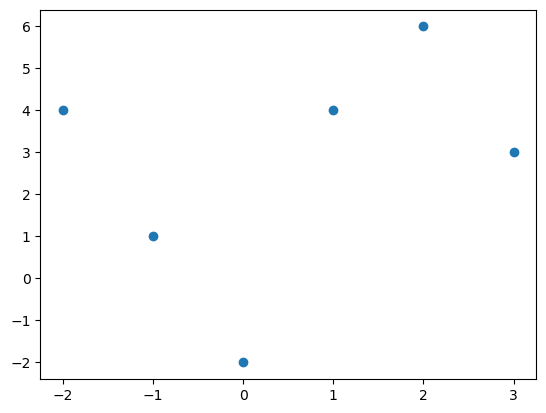

In [59]:
##Lo que se busca con la interpolacion de Lagrange es encontrar un polinomio que satisfaga pasar por cada uno de los puntos marcados 
##Donde X y Y son el conjunto soporte
X = np.array([-2,-1,0,1,2,3])
Y = np.array([4.,1.,-2.,4.,6.,3.])
plt.scatter(X,Y)

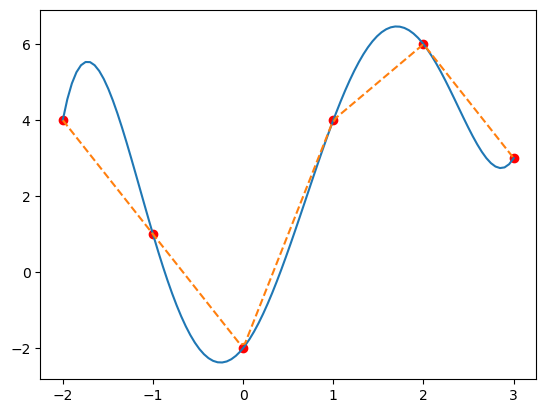

In [60]:
def BaseLagrange(x,X,i):
    '''
    Parametros:
    x = La variable x, sin embargo aca se trata como todos los puntos que quiero que queden graficados para el polinomio encontrado
    X = Conjunto soporte de los inputs
    i = X[i] es el numero que se debe evitar tomar para X[j] en la multiplicatoria
    '''
    L = 1
    for j in range(X.shape[0]):
     if j != i:
        L *= (x-X[j])/(X[i]-X[j])
    return L

def InterpolacionLagrange(x,X,Y):
   '''
    Parametros:
    x = La variable x, sin embargo aca se trata como todos los puntos que quiero que queden graficados para el polinomio encontrado
    X = Conjunto soporte de los inputs
    Y = Conjunto soporte de los outputs
    '''
   P = 0
   for i in range(X.shape[0]):
      P+=BaseLagrange(x,X,i) * Y[i]
   return P

x = np.linspace(-2.,3.,100)
plt.plot(x,InterpolacionLagrange(x,X,Y))
plt.plot(x,np.interp(x,X,Y), '--')
plt.scatter(X,Y,color='r',marker='o')


Sympy

In [61]:
##Sympy funciona para colocar las variables x y para observar el resultado sin necesidad de colocar valores exactos.

xa = sym.Symbol('x',real=True)
xa

In [62]:
BasesCardinales = []
for i in range(X.shape[0]):
    BasesCardinales.append(BaseLagrange(xa,X,i))
BasesCardinales

In [63]:
##Aca se hace uso de sympy para obtener el polinomio de una forma mas explicita
f = InterpolacionLagrange(xa,X,Y)
##Sym.simplify funciona para simplificar el polinomio para quedar de la forma mas reducida posible
f = sym.simplify(f)
##sym.diff diferencia la funcion, el ultimo parametro es la cantidad de veces que se quiere diferenciar. 
df = sym.diff(f,xa,1)
df = sym.diff(f,xa,2)
df

Interpolacion de Newton

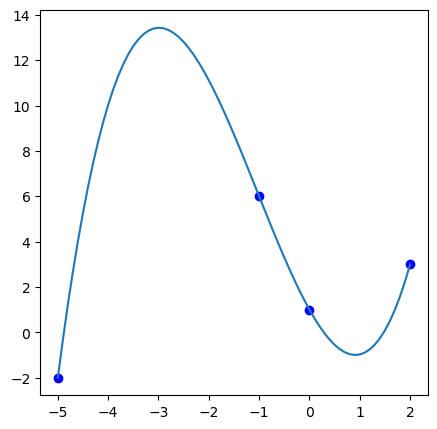

In [65]:
##Se tiene el conjunto soporte:
X = np.array([-5, -1, 0, 2])
Y = np.array([-2, 6, 1, 3])

##Este es el proceso para obtener las diferencias divididas:
#Diferencia divida solo para dos valores del conjunto soporte 
f1 = (Y[1]-Y[0])/(X[1]-X[0])
f2 = (Y[2]-Y[1])/(X[2]-X[1])

def diferencia_dividida(X,Y):
    matrix = np.zeros((X.shape[0],Y.shape[0]))
    matrix[:,0] = Y
    for j in range(1,matrix.shape[0]):
        for i in range(matrix.shape[1]-j):
            matrix[i][j] = (matrix[i+1][j-1] - matrix[i][j-1])/(X[i+j]-X[i])
    return matrix

def multiplicatoria_newton(X,x,k):
    result = 1
    for i in range(k):
        result*=(x-X[i])
    return result

def interpolacion_newton(X,Y,x):
    result = 0
    coefi = diferencia_dividida(X,Y)[0,:]
    for k in range(X.shape[0]):
        result += coefi[k]*multiplicatoria_newton(X,x,k)
    return result
    
x_new = np.arange(-5, 2.1, .1)
y_new = interpolacion_newton(X, Y, x_new)

plt.figure(figsize = (5, 5))
plt.plot(X, Y, 'bo')
plt.plot(x_new, y_new)


In [68]:
x = sym.Symbol('x',real=True)
y = interpolacion_newton(X,Y,x).simplify()
y

In [70]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file
Data = pd.read_csv(Path_,sep=',')
Data

---Archivo encontrado---


,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


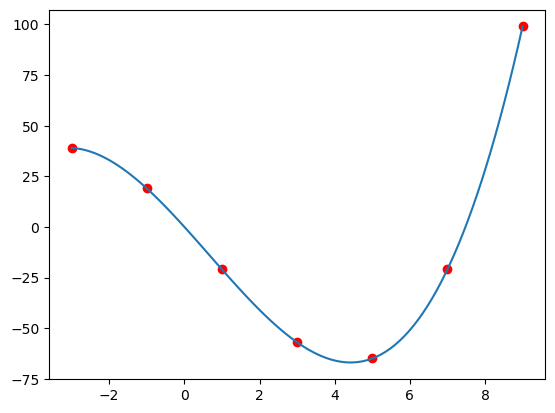

In [71]:
X = np.array(Data.X)
Y = np.array(Data.Y)
x = np.linspace(np.min(X),np.max(X),100)
plt.scatter(X,Y,color='r')
plt.plot(x,interpolacion_newton(X,Y,x))


In [72]:
x = sym.Symbol('x',real=True)
y = interpolacion_newton(X,Y,x).simplify()
y